In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner 
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmpub5o2qpwGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')
# images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
# masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_unn.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_unn.npy')
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final_unn.npy')


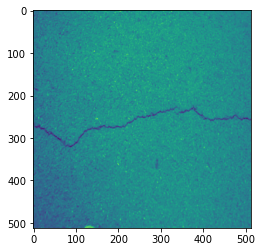

In [5]:
imshow(images[0])

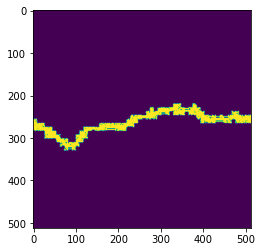

In [6]:
imshow(masks[0])

In [7]:
images = images[:11298]

In [8]:
masks = masks[:11298]

In [9]:
images.shape

(11298, 512, 512, 1)

In [10]:
masks.shape

(11298, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 29s 2s/step - loss: 0.9190 - dice_coeff: 0.0925 - val_loss: 0.3391 - val_dice_coeff: 0.1492
Epoch 2/100
9/9 [==============================] - 9s 1s/step - loss: 0.8609 - dice_coeff: 0.1031 - val_loss: 0.3493 - val_dice_coeff: 0.1751
Epoch 3/100
9/9 [==============================] - 9s 1s/step - loss: 0.8170 - dice_coeff: 0.1126 - val_loss: 0.4424 - val_dice_coeff: 0.1791
Epoch 4/100
9/9 [==============================] - 9s 1s/step - loss: 0.7861 - dice_coeff: 0.1189 - val_loss: 0.4592 - val_dice_coeff: 0.1756
Epoch 5/100
9/9 [==============================] - 9s 1s/step - loss: 0.7583 - dice_coeff: 0.1247 - val_loss: 0.4559 - val_dice_coeff: 0.1732
Epoch 6/100
9/9 [==============================] - 9s 1s/step - loss: 0.7382 - dice_coeff: 0.1273 - val_loss: 0.4648 - val_dice_coeff: 0.1664
Epoch 7/100
9/9 [==============================] - 9s 1s/step - loss: 0.7190 - dice_coeff: 0.1320 - val_loss: 0.4945 - va

In [13]:
R.classifier_scores

[[0.3835298418998718, 0.2734931409358978],
 [0.18520288169384003, 0.3743385076522827],
 [0.16501642763614655, 0.4169754981994629],
 [0.183051198720932, 0.423189640045166],
 [0.1322653740644455, 0.4632357358932495],
 [0.11641604453325272, 0.48033592104911804],
 [0.11250467598438263, 0.5166124701499939]]

In [14]:
R.discriminator_scores

[[2.3153548056598083e-07, 1.0],
 [0.006030761171132326, 0.9985228776931763],
 [0.024922622367739677, 0.9955686926841736],
 [0.008434457704424858, 0.9985228776931763],
 [0.18840143084526062, 0.9793205261230469],
 [0.40628525614738464, 0.9675036668777466],
 [0.8180763125419617, 0.9468242526054382]]

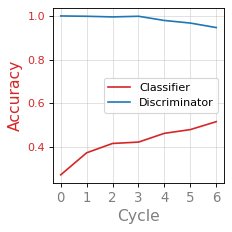

In [15]:
R.plot() 

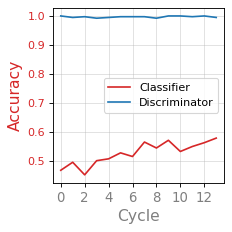

In [20]:
R.plot() //This is when I run for the first time